Content Image:


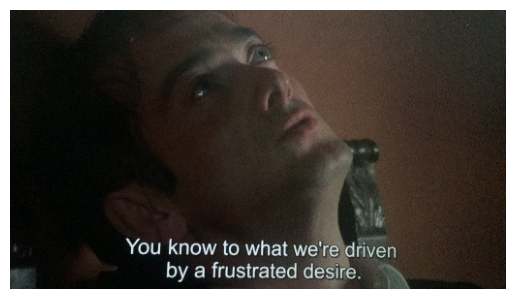

Style Image:


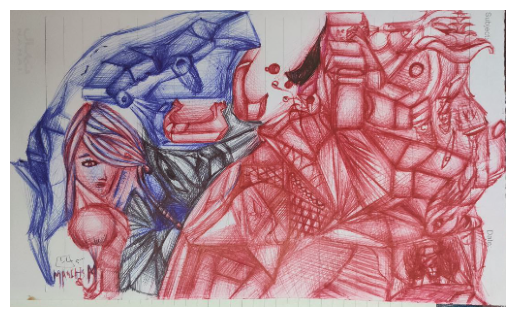

Stylized Image:


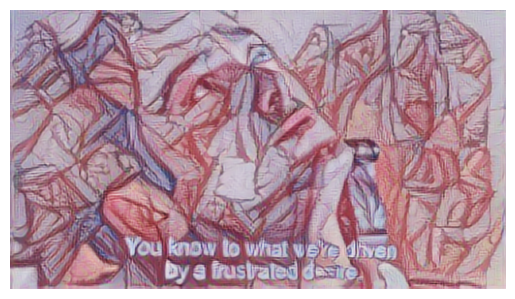

In [48]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

def load_img(path):
    """Loads and preprocesses an image from file."""
    max_dim = 512
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

def display_image(image):
    """Displays a TensorFlow image tensor."""
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def tensor_to_image(tensor):
    """Converts a TensorFlow tensor back to a PIL image."""
    tensor = tf.clip_by_value(tensor, 0.0, 1.0)
    tensor = tf.image.convert_image_dtype(tensor, dtype=tf.uint8)
    if tensor.shape[0] > 1:
        tensor = tf.squeeze(tensor, axis=0)
    return tensor.numpy()


content_path = 'C:/Users/Josep/OneDrive/Desktop/s.jpg'
style_path = 'C:/Users/Josep/OneDrive/Desktop/13.png'

# Load content and style images
content_image = load_img(content_path)
style_image = load_img(style_path)

# Load the style transfer model
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Stylize the content image using the style image
stylized_image = hub_module(tf.image.convert_image_dtype(content_image, tf.float32),
                            tf.image.convert_image_dtype(style_image, tf.float32))[0]


print("Content Image:")
display_image(content_image[0])

print("Style Image:")
display_image(style_image[0])

print("Stylized Image:")
display_image(stylized_image)
